## Maldición de la dimensionalidad


Este tutorial ilustra lo que se llama la "maldición de la alta dimensión". Por ejemplo, generando puntos uniformemente en el hipercubo unitario, es fácil de ver que la distancia promedio entre estos puntos aleatorios, aumenta con la dimensión. De la misma manera, dichos puntos tienden a caer fuera de la hiperesfera unitaria inscrita en el hypercubo, mostrando que en altas dimensiones, casi todo el volumen del espacio se encuentra en las esquinas del hipercubo.

## 1. Norma Euclideana y Distancia

### Norma Euclideana

Considere un vector $y=(y_1,…,y_n)$ con $n$ elementos. The norma Euclidean de un vector $y$ es denotada por $||y|| $, y definida por la versión generalizada del teorema de Pytagoras,

$$ \vert\vert{y}\vert\vert = \sqrt{y_1^2 + y_2^2 + ..... y_n^2} $$

En otras palabras, la norma del vector es la raiz cuadrada de la suma de los elementos al cuadrado.

Adicionalmente, es fácil de ver que viendo $y$ como un vector fila, entonces la raiz cuadrada del producto punto por el mismo es exactamente su norma Euclideana, es decir:
$$\vert\vert{y}\vert\vert = \sqrt{yy^T} $$


#### Como calcular la norma Euclideana de un vector en Python


In [1]:
import numpy as np
def norma_euclideana(x): return np.linalg.norm(x)

Usando Python numpy, uno puede calcular rapidamente  la distancia Euclideana por medio de la norma del vector, es decir np.linalg.norm. Podemos probar en un caso simple:
||(3,4)||=5

In [2]:
norma_euclideana(np.array([3, 4]))

5.0

### Distancia Euclideana

La distancia Euclideana entre dos vectores$ x=(x_1,…,x_n) $  y $ y=(y_1,…,y_n) $ , denotada por $ d(x,y) $ es la normal Euclideana del vector $ x−y $ es decir,

$$ d(x,y) = \sqrt{(x_1 - y_1)^2 +.....(X_n - y_n)^2} $$

In [3]:
x = np.array([3, 4])
y = np.array([2, 3])

distancia_euclideana = norma_euclideana(x-y)

In [4]:
distancia_euclideana

1.4142135623730951

Otra manera de calcular esta distancia Euclideana es usando la librería scipy.spatial.distance 

In [5]:
from scipy.spatial.distance import euclidean

In [6]:
euclidean(x,y)

1.4142135623730951

## 2. Todo el Volumen se encuentra en las esquinas

Asuma que se tiene un cuadrado con un circulo inscrito en el, o en general un hiper-cubo y una hiper-esfera. En esta sección ilustramos el curioso hecho que cuando la dimensión crece, la mayor parte de los puntos en el hipercubo caen fuera de la hiperespera.

### Usando el método de Monte Carlo para calcular el valor de $\pi$

Vamos a mirar el caso donde $d=2$. Se sabe que el area del circulo es $\pi r^2$, con $r=\frac{1}{2}$, así que el area es $\frac{\pi}{4}$. Por el método de MonteCarlo, se generan valores aleatorios en el cuadrado y se cuentan cuantos valores están en el circulo.

In [7]:
import matplotlib.pyplot as plt

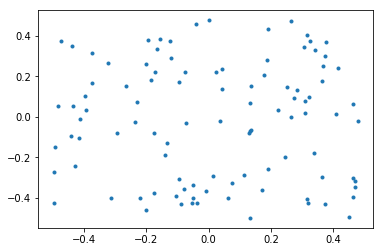

(100, 2)


In [10]:
M = int(1e2)
dim=2
y = np.random.uniform(low=-0.5, high=0.5,size=(M,dim))
plt.plot(y[:,0], y[:,1], '.')
plt.show()
print(y.shape)


In [ ]:
p = np.sum(np.sqrt(y[:,0]**2 + y[:,1]**2) < 0.5)/M
print('Estimación de Pi:',4*p)
print('Error de la estimación',abs(4*p-np.pi))

Ahora aumentando el número de simulaciones, la aproximación mejora.

In [12]:
M = int(1e3)
#print(M)
y = np.random.uniform(low=-0.5, high=0.5,size=(M,dim))
p = np.sum(np.sqrt(y[:,0]**2 + y[:,1]**2) < 0.5)/M
print(4*p)
print('Error de aproximación:',abs(4*p-np.pi))

M = int(1e5)
#print(M)
y = np.random.uniform(low=-0.5, high=0.5,size=(M,dim))
p = np.sum(np.sqrt(y[:,0]**2 + y[:,1]**2) < 0.5)/M
print(4*p)
print('Error de aproximación:',abs(4*p-np.pi))

M = int(1e7)
#print(M)
y = np.random.uniform(low=-0.5, high=0.5,size=(M,dim))
p = np.sum(np.sqrt(y[:,0]**2 + y[:,1]**2) < 0.5)/M
print(4*p)
print('Error de aproximación',abs(4*p-np.pi))



3.196
Error de aproximación: 0.05440734641020706
3.13648
Error de aproximación: 0.005112653589792959
3.1410928
Error de aproximación 0.0004998535897930978


Ahora, vamos a calcular el volumen de la hiperesfera inscrita en el hipercubo unitario (el cual tiene volumen uno) aumentando la dimensions.

In [13]:
from scipy.spatial.distance import cdist
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,10]
plt.style.use('seaborn-darkgrid')

In [14]:
dim_MAX = 20
M = int(1e5)
dims = np.zeros(dim_MAX, dtype=np.int32)
volume = np.zeros(dim_MAX)
for dim in range(1,dim_MAX+1):
    y = np.random.uniform(low=-0.5, high=0.5,size=(M,dim))
    # cdist calcula la distancia entre dos matrices incluso de diferente tamaño y-> (M,N) and [[0..0]]
    dist = cdist(y,np.expand_dims(np.zeros(dim),0),metric='euclidean')
    dims[dim-1] = dim
    volume[dim-1] = np.sum(dist < 0.5)/M
df=pd.DataFrame(data={'dims': dims,'volume': volume})
print(df)

    dims   volume
0      1  1.00000
1      2  0.78451
2      3  0.52459
3      4  0.30721
4      5  0.16529
5      6  0.08111
6      7  0.03800
7      8  0.01592
8      9  0.00704
9     10  0.00289
10    11  0.00095
11    12  0.00039
12    13  0.00017
13    14  0.00003
14    15  0.00000
15    16  0.00002
16    17  0.00000
17    18  0.00000
18    19  0.00000
19    20  0.00000


Así hemos calculado la probabilidad que un vector esté en la hiperesfera inscrita en la hipercubo unitario, esa cantidad da el volumen de dicha hiperesfera.

Text(0,0.5,'Volumen de la hyperbola inscrita')

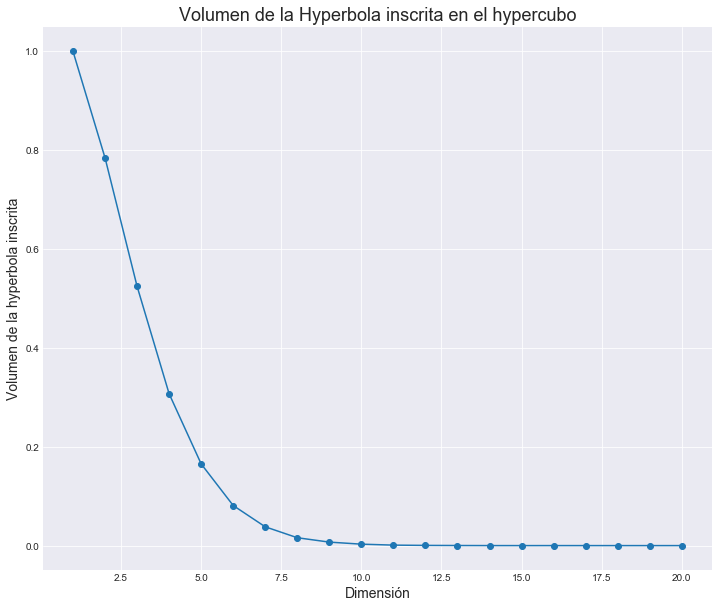

In [15]:
plt.plot(df.dims, df.volume,'o-')
plt.title('Volumen de la Hyperbola inscrita en el hypercubo',size=18)
plt.xlabel('Dimensión',size=14)
plt.ylabel('Volumen de la hyperbola inscrita',size=14)

### Todos los puntos estan lejos!

Otra manera de ver el efecto de la alta dimensión, es que los datos están en promedio cada vez más lejos. 

Caso: Distribución Uniforme

Text(0,0.5,'Distancia Euclideana')

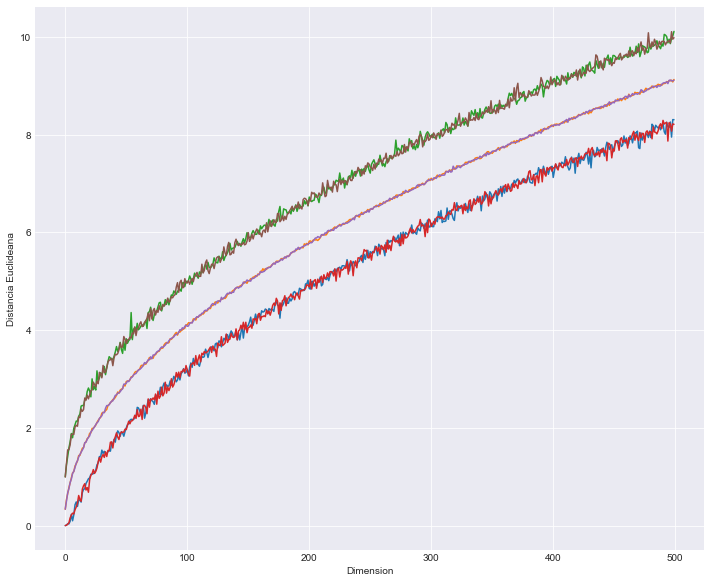

In [16]:
M=100
for rep in range(2): #Número de Repeticiones del Experimento
    resmin=[]
    resmax=[]
    resmean=[]
    for dim in range(500):
        y = np.random.uniform(low=-.5, high=0.5,size=(M,dim+1))
        dist = cdist(y,y,metric='euclidean')
        v=dist[np.triu_indices(M, k = 1)]
        resmin.append(np.min(v))
        resmax.append(np.max(v))
        resmean.append(np.mean(v))
    plt.plot(resmin,label='Min')
    plt.plot(resmean,label='Mean')
    plt.plot(resmax,label='Max')
plt.xlabel('Dimension')
plt.ylabel('Distancia Euclideana')

Caso: Distribución Gaussiana

Text(0,0.5,'Distancia')

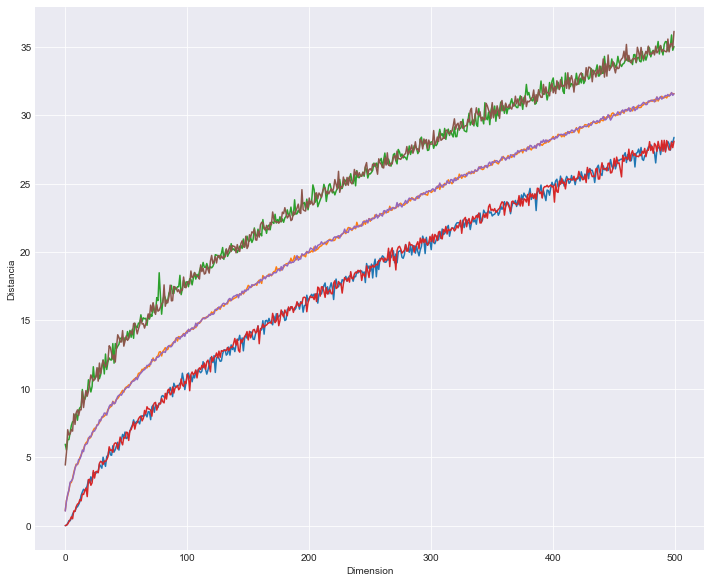

In [17]:
M=100
for rep in range(2):
    resmin=[]
    resmax=[]
    resmean=[]
    for dim in range(500):
        y = np.random.normal(size=(M,dim+1))
        dist = cdist(y,y,metric='euclidean')
        v=dist[np.triu_indices(M, k = 1)]
        resmin.append(np.min(v))
        resmax.append(np.max(v))
        resmean.append(np.mean(v))
    plt.plot(resmin,label='Min')
    plt.plot(resmean,label='Mean')
    plt.plot(resmax,label='Max')
#plt.legend()
plt.xlabel('Dimension')
plt.ylabel('Distancia')

Caso: Correlación en Alta Dimensión

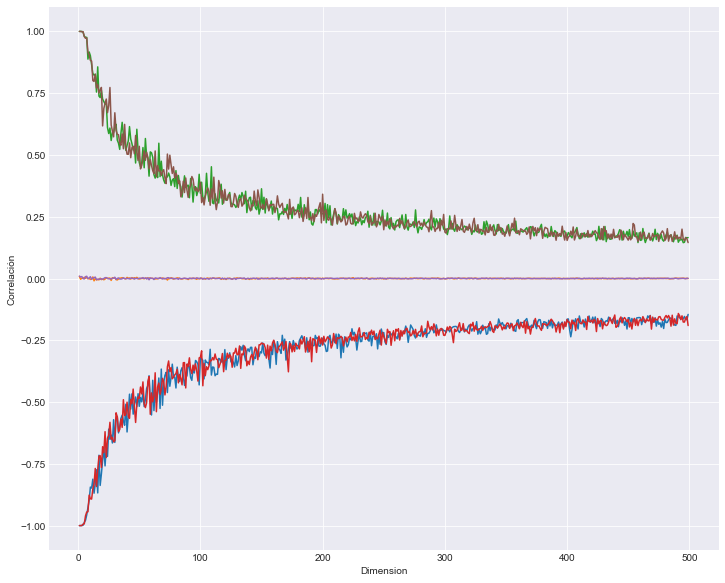

In [18]:
M=100
for rep in range(2):
    resmin=[]
    resmax=[]
    resmean=[]
    for dim in range(500):
        y = np.random.normal(size=(M,dim+1))
        dist = cdist(y,y,metric='correlation')
        #Cdist calcular el valor 1 - CORR según la documentación
        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
        
        v=dist[np.triu_indices(M, k = 1)]-1
        resmin.append(np.min(v))
        resmax.append(np.max(v))
        resmean.append(np.mean(v))
    plt.plot(resmin,label='Min')
    plt.plot(resmean,label='Mean')
    plt.plot(resmax,label='Max')
#plt.legend()
plt.xlabel('Dimension')
plt.ylabel('Correlación')
plt.show()

## 4. Distribución Normal

El logaritmo de la distribución de normal con parámetros $\mu \in \mathbb{R}$ y $\sigma \in \mathbb{R}^+$ es definito por 

$$ \mathsf{Normal}(y \mid \mu, \sigma) = \frac{1}{\sqrt{2 \pi}}\frac{1}{\sigma} \exp \left( -\frac{1}{2} \left( \frac{y - \mu}{\sigma} \right)^2 \right). $$

Para el caso de distribución estandarizada: 

$$ \mathsf{Normal}(y \mid 0, 1) = \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{1}{2} \ y^2 \right). $$

Luego de cambiar a escala logaritmica, se tiene:

$$ \log \mathsf{Normal}(y \mid 0, 1) \ = \ -\frac{1}{2} \ y^2 + \mathrm{constante} $$

donde la constante no depende $y$. 

De esta forma, es fácil de ver la relación entre la distribución normal y la distance.

Para multiples muestras i.i.d. con distribución normal estandar $y = (y_1, \ldots, y_N)$, y 
$$ \log p(y)  = \sum_{n=1}^N -\frac{1}{2} y_n^2 + c =-\frac{1}{2} yy^{\top} +c = -\frac{1}{2} || y ||^2 + c$$
En otras palabras, el log de la densidad en esta caso es proporcional a la mitad de la distancia al origen. Un desarrollo similar puede hacerse para el caso multivariado.

## 5. Vector Aleatorio Normal Unitario

In [19]:
D = 10
u = np.random.randn(D)
print(u)

[ 0.91792626  0.06614253 -0.11648387  0.90554637 -0.29251004 -0.07428157
 -0.85640509  0.23705118  0.3819808  -1.91183399]


In [20]:
print(norma_euclideana(u))

2.522353569759273


Cual es la distribución de la norma de los vectores en función de la dimensión?

In [21]:
import scipy.stats as stats

N = int(1e4)
dim = np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128, 181, 256])
D = len(dim)

lower = np.zeros(D);
middle = np.zeros(D);
upper = np.zeros(D);
lower_ll = np.zeros(D);
middle_ll = np.zeros(D);
upper_ll = np.zeros(D);
max_ll = np.zeros(D);

for k in range(D):
    d = dim[k]
    y = np.zeros(N)
    ll = np.zeros(N)

    for n in range(N):
        sim=np.random.randn(d)
        y[n] = norma_euclideana(sim)
        ll[n] = np.sum(stats.norm.logpdf(sim))
        
    # Intervalos de la norma euclidiana        
    lower[k] = np.percentile(y,.5)
    middle[k] = np.percentile(y,50)
    upper[k] = np.percentile(y,99.5)
    
    # Intervalos de confianza de la verosimilitud
    lower_ll[k] = np.percentile(ll,.5)
    middle_ll[k] = np.percentile(ll,50)
    upper_ll[k] = np.percentile(ll,99.5)
    
    max_ll[k] = np.sum(stats.norm.logpdf(np.zeros(d))) 
    #La moda de la distribución es el vector O

In [22]:
from collections import OrderedDict
df = pd.DataFrame(OrderedDict({'dim':dim, 'lb':lower, 'mid': middle, 'ub': upper,
                      'lb_ll' : lower_ll, 'mid_ll': middle_ll,
                      'ub_ll' : upper_ll, 'max_ll' : max_ll}))

In [23]:
df

dim         lb        mid         ub       lb_ll      mid_ll       ub_ll  \
0     1   0.005673   0.678143   2.851338   -4.984001   -1.148878   -0.918955   
1     2   0.106993   1.182217   3.211991   -6.996319   -2.536695   -1.843601   
2     4   0.481372   1.814869   3.828562  -11.004697   -5.322629   -3.791614   
3     5   0.628416   2.090837   4.096543  -12.985523   -6.780492   -4.792146   
4     8   1.168164   2.711008   4.723086  -18.505279  -11.026290   -8.033812   
5    11   1.629748   3.209650   5.195170  -23.603222  -15.259251  -11.436364   
6    16   2.259780   3.919334   5.847073  -31.797147  -22.383604  -17.256319   
7    22   2.946417   4.613450   6.600912  -42.002668  -30.858608  -24.557335   
8    32   3.915340   5.598769   7.507914  -57.590418  -45.079139  -37.070977   
9    45   4.956204   6.641267   8.536439  -77.787633  -63.405448  -53.634211   
10   64   6.187187   7.954735   9.816845 -106.997290  -90.450969  -77.952705   
11   90   7.694349   9.449319  11.355546 -147.178685 -127.349280 -112.305975   
12  128   9.539524  11.289188  13.122157 -203.719635 -181.347013 -163.125392   
13  181  11.641251  13.422807  15.272417 -282.951240 -256.413753 -234.087236   
14  256  14.160982  15.970024  17.865178 -394.830555 -362.769105 -335.514966   

        max_ll  
0    -0.918939  
1    -1.837877  
2    -3.675754  
3    -4.594693  
4    -7.351508  
5   -10.108324  
6   -14.703017  
7   -20.216648  
8   -29.406033  
9   -41.352234  
10  -58.812066  
11  -82.704468  
12 -117.624132  
13 -166.327875  
14 -235.248265

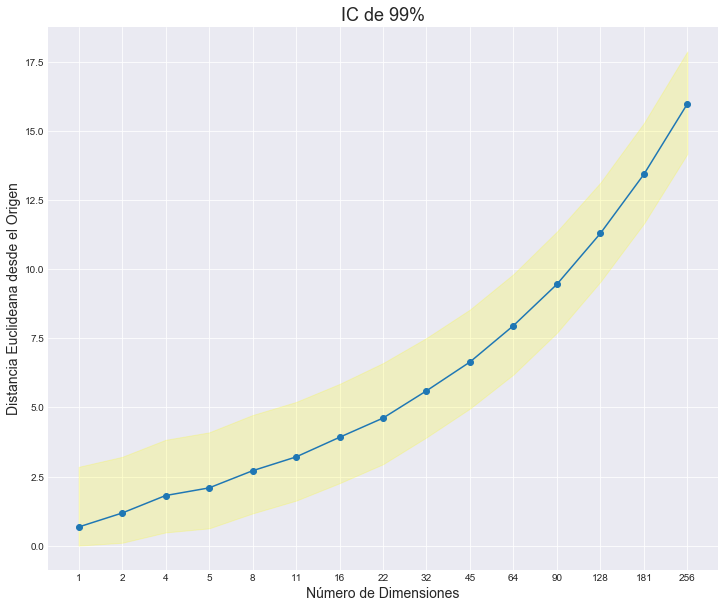

In [24]:
plt.plot(df.mid,'o-')
plt.fill_between(np.arange(len(df)),df.lb, df.ub,color='yellow', alpha=0.2)
plt.xticks(np.arange(len(df)), df.dim)
plt.xlabel('Número de Dimensiones',size=14)
plt.ylabel('Distancia Euclideana desde el Origen',size=14)
plt.title('IC de 99%', size=18)
plt.show()

Incluso en dimensiones 16, el intervalo de 99% de confianza está muy lejos de cero, el cual es la moda de la dsitribución.

### Medida de Concentración

El siguiente gráfico muestra el valor mediano del logaritmo de la probabilidad y el IC del 99% de los valores aleatorios

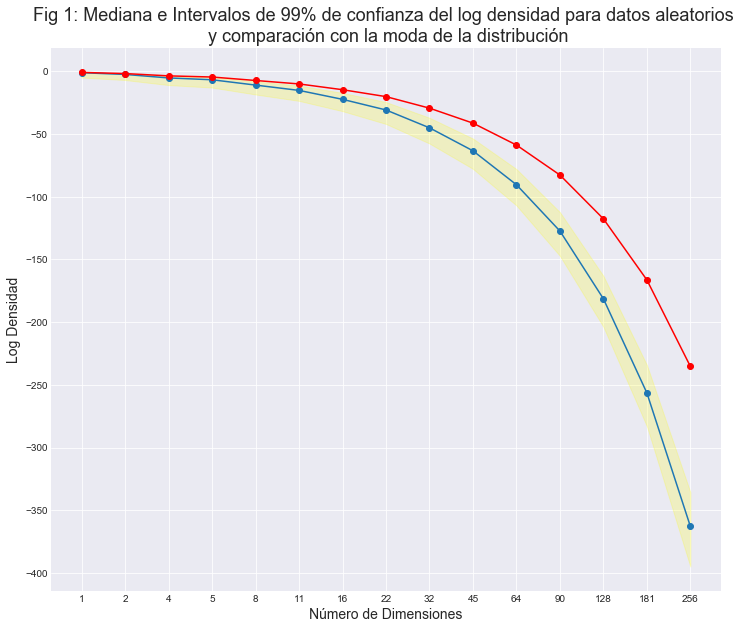

In [25]:
plt.plot(df.mid_ll,'o-')
plt.plot(df.max_ll,'ro-')
plt.fill_between(np.arange(len(df)),df.lb_ll, df.ub_ll,color='yellow', alpha=0.2)
plt.xticks(np.arange(len(df)), df.dim)
plt.xlabel('Número de Dimensiones',size=14)
plt.ylabel('Log Densidad',size=14)
plt.title('Fig 1: Mediana e Intervalos de 99% de confianza del log densidad para datos aleatorios \n y comparación con la moda de la distribución', size=18)
plt.show()

### Nadie es promedio!

Esto es contraintruitivo, porque se puede concluir que el individuo promedio de la población está fuera del intervalo de confianza, es decir que es un individuo "outlier". Porque un individuo que tiene cada caracteristica promedio es inusual? Precisamente, porque es inusual de tener tantas variables cercanas al promedio.


## Tarea:

Cree una función que genere 1000 vectores aleatorios de una distribución normal multivariada con vector media $\mu=0_{d}$ y matrix de covarianza $2*I_{d}$, para diferente valores de d (dimension).

a) Calcule y grafique los intervalos de confianza de 95% para las distancias entre los vectores generados.

b) Calcule y grafique los intervalos de confianza de 95% para el ángulo entre los vectores generados.

c) Con una vector media $\mu=2_{d}$ y matrix de covarianza $2*I_{d}$. Realice la Fig. 1 (Mediana e Intervalos de 99%...) para este caso. (Note que se debe adaptar el código en la simulación y en el cálculo de la probabilidad asociada a la moda de la distribución). 

Ayuda:
La función numpy.random.multivariate_normal permite generar directamente vectores para esta distribución. Por ejemplo: np.random.multivariate_normal(np.zeros(3),np.eye(3),size=5) genera 5 valores aleatorios de la distribución centrada en zero y con matriz identidad.